In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing

In [2]:
#load data sets
df_test = pd.read_csv('SalaryData_Test(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
df_train = pd.read_csv('SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


No Null Values.

In [6]:
# Duplicate values
df_train[df_train.duplicated()].shape, df_test[df_test.duplicated()].shape

((3258, 14), (930, 14))

In [7]:
df_train.drop_duplicates()
df_test.drop_duplicates();

In [8]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


* Heat map

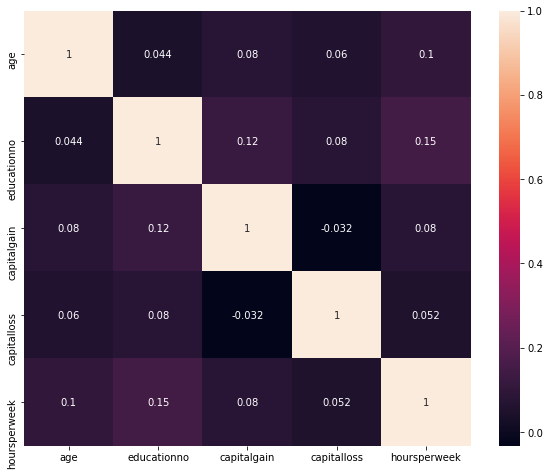

In [10]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_train.corr(), annot = True);

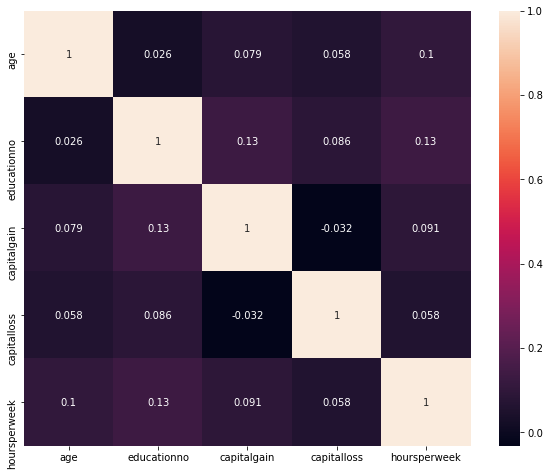

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_test.corr(), annot = True);

In [12]:
labels = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 
          'sex', 'native', 'Salary']
dftrain = df_train.copy()
dftest = df_test.copy()
label_encoder = preprocessing.LabelEncoder()
for x in labels:
    dftrain[x] = label_encoder.fit_transform(dftrain[x])
    dftest[x] = label_encoder.fit_transform(dftest[x])

In [13]:
dftrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


* Train test split

We dont need to split since we have a seperate data set on which testing can be done.

In [14]:
X_train = dftrain[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
y_train = dftrain['Salary']

In [15]:
X_test = dftest[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
y_test = dftest['Salary']

* Linear Support Vector Machine

In [16]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.22)
svc.fit(X_train, y_train)
score_svc = svc.score(X_test, y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8157370517928287


* Radical Support Vector Machine

In [17]:
from sklearn import svm
svc_radical = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.22)
svc_radical.fit(X_train, y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.8157370517928287


* support vector Machine

In [18]:
from sklearn import svm 
svc_radical = svm.SVC(kernel = 'sigmoid', C = 1, gamma = 0.22)
svc_radical.fit(X_train, y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.7543160690571049


In [19]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.33)
svc.fit(X_train, y_train)
score_svc = svc.score(X_test, y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8076361221779549


# Final Model

In [ ]:
from sklearn import svm 
svc_radical = svm.SVC(kernel = 'poly', C = 1, gamma = 0.33)
svc_radical.fit(X_train, y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)